PROBLEM STATEMENT:-

This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation score

DATA COLLECTION:-

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

data consists of 8 columns and 100 rows


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


CHECKS TO PERFORM

-missing values
-duplicate values 
-data types 
-number of unique values of each column 
-statistics of data set
-various categories present in the -different categorical column 


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


INSIGHTS:-
-from above observations, all means are very close to each other : between 66 and 68.05;
-all standard deviations are also close : between 14.6 and 15.19;
-while there is a minimum score 0 for match, for writing min is much higher,10, and for reading more higher, 17;


In [24]:
print("Categories in 'gender' variable:",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation' variable:",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation' variable: ['none' 'completed']


In [26]:
#define numerical and categorical variables
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print("Numerical features:{} they are {}".format(len(numerical_features), numerical_features))
print("Categorical features:{} they are {}".format(len(categorical_features), categorical_features))

Numerical features:3 they are ['math score', 'reading score', 'writing score']
Categorical features:5 they are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [27]:
### Adding columns for "Total Score" and "Average Score"
# there are 3 different scores- math, reading and writing

df['Total_Score']=df['math score']+df['reading score']+df['writing score']
df['Average_Score']=df['Total_Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full=df[df['reading score']==100]['Average_Score'].count()
writing_full=df[df['writing score']==100]['Average_Score'].count()
math_full=df[df['math score']==100]['Average_Score'].count()

print("Number of students who scored 100 in reading:",reading_full)
print("Number of students who scored 100 in writing:",writing_full)
print("Number of students who scored 100 in math:",math_full)


Number of students who scored 100 in reading: 17
Number of students who scored 100 in writing: 14
Number of students who scored 100 in math: 7


In [33]:
reading_less_20=df[df['reading score']<=20]['Average_Score'].count()
writing_less_20=df[df['writing score']<=20]['Average_Score'].count()
math_less_20=df[df['math score']<=20]['Average_Score'].count()

print("Number of students who scored less than 20 in reading:",reading_less_20)
print("Number of students who scored less than 20 in writing:",writing_less_20)
print("Number of students who scored less than 20 in math:",math_less_20)


Number of students who scored less than 20 in reading: 1
Number of students who scored less than 20 in writing: 3
Number of students who scored less than 20 in math: 4


# EXPLORATORY DATA ANALYSIS

histogram and KDE

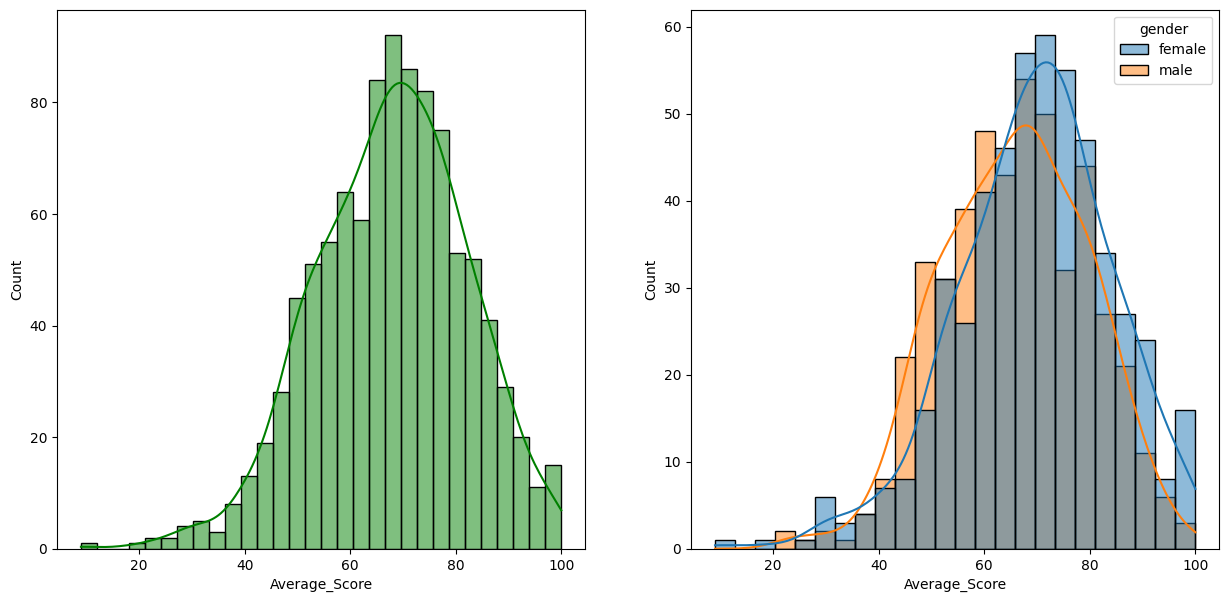

In [34]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_Score',kde=True,hue='gender')
plt.show()

female performed well !!

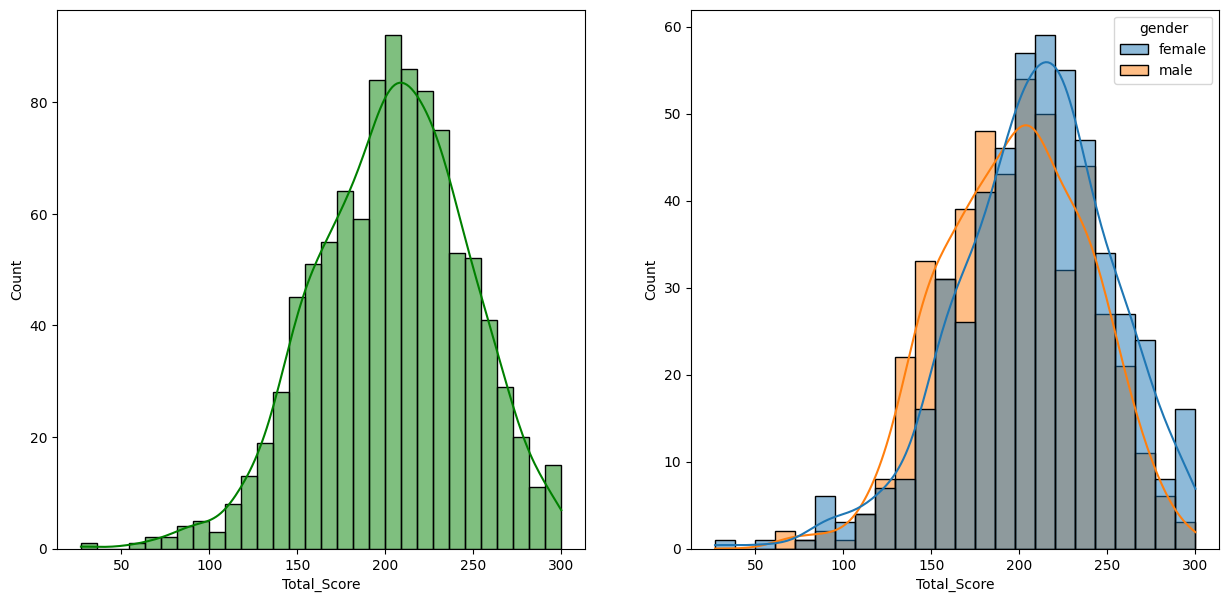

In [35]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.show()